# EDA

In [23]:
import os
import warnings
from datetime import timedelta

import duckdb
import missingno as msno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import root_mean_squared_log_error
from itertools import combinations
from sklearn.metrics import mean_squared_log_error

from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor

In [24]:
r = r"C:\Users\SAMSUNG\Desktop\DA_ 2기_최승연\스프린트14"
os.chdir(r)

In [25]:
df_test = duckdb.read_csv(r"raw\test.csv")

In [26]:
duckdb.read_csv("raw/train.csv")
df_train = pd.read_csv("raw/train.csv")

In [27]:
df_test.describe() #결측치 없음 확인

┌─────────┬─────────────────────┬────────────────────┬──────────────────────┬─────────────────────┬────────────────────┬────────────────────┬────────────────────┬───────────────────┬───────────────────┐
│  aggr   │      datetime       │       season       │       holiday        │     workingday      │      weather       │        temp        │       atemp        │     humidity      │     windspeed     │
│ varchar │       varchar       │       double       │        double        │       double        │       double       │       double       │       double       │      double       │      double       │
├─────────┼─────────────────────┼────────────────────┼──────────────────────┼─────────────────────┼────────────────────┼────────────────────┼────────────────────┼───────────────────┼───────────────────┤
│ count   │ 6493                │             6493.0 │               6493.0 │              6493.0 │             6493.0 │             6493.0 │             6493.0 │            6493.0 │      

In [28]:
df_train.describe() #no null

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [29]:
duckdb.sql("SELECT * FROM df_test").df()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [30]:
def read_query(query):
    df = duckdb.sql(query).df()
    return df

read_query("SELECT * FROM df_test")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [31]:
read_query("SELECT * FROM df_train")

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [33]:
df_train['datetime'] = pd.to_datetime(df_train['datetime'])

In [34]:
duckdb.sql(
    """SELECT STRFTIME('%Y-%m', datetime) AS month,
    AVG(temp) AS avg_temp
    FROM df_train
    GROUP BY MONTH
    ORDER BY MONTH"""
).df()

,month,avg_temp
0,2011-01,8.633782
1,2011-02,11.331076
2,2011-03,14.063184
3,2011-04,17.776879
4,2011-05,21.528596
5,2011-06,28.191096
6,2011-07,29.967763
7,2011-08,29.667456
8,2011-09,25.141236
9,2011-10,20.903692


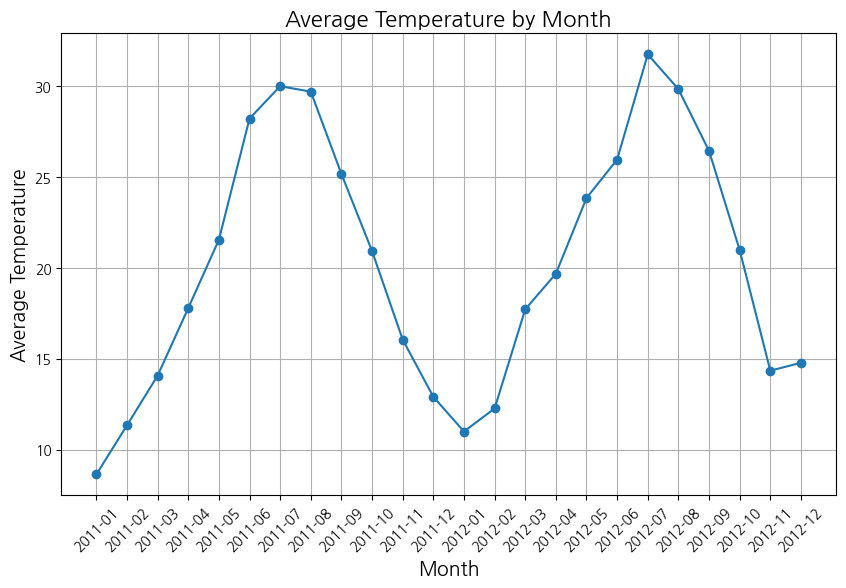

In [35]:
query = """SELECT STRFTIME('%Y-%m', datetime) AS month,
    AVG(temp) AS avg_temp
    FROM df_train
    GROUP BY MONTH
    ORDER BY MONTH"""
result = duckdb.query(query).df()

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(result["month"], result["avg_temp"], marker='o')
plt.title("Average Temperature by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Temperature", fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [36]:
duckdb.sql(
    """SELECT STRFTIME('%Y-%m', datetime) AS month,
    AVG(temp) AS avg_temp,
    MAX(temp) AS max_temp,
    MIN(temp) as min_temp
    FROM df_train
    GROUP BY MONTH
    ORDER BY MONTH"""
).df()



,month,avg_temp,max_temp,min_temp
0,2011-01,8.633782,18.86,3.28
1,2011-02,11.331076,27.06,2.46
2,2011-03,14.063184,28.70,4.92
3,2011-04,17.776879,31.16,9.84
4,2011-05,21.528596,29.52,13.94
5,2011-06,28.191096,38.54,19.68
6,2011-07,29.967763,36.90,23.78
7,2011-08,29.667456,37.72,24.60
8,2011-09,25.141236,32.80,15.58
9,2011-10,20.903692,30.34,13.12


In [37]:
duckdb.sql(
    """SELECT STRFTIME('%Y-%m', datetime) AS month,
    AVG(atemp) AS avg_temp,
    MAX(atemp) AS max_temp,
    MIN(atemp) as min_temp
    FROM df_train
    GROUP BY MONTH
    ORDER BY MONTH"""
).df()

,month,avg_temp,max_temp,min_temp
0,2011-01,10.767981,22.725,3.030
1,2011-02,13.999922,31.060,3.790
2,2011-03,16.895594,31.820,4.545
3,2011-04,21.239835,33.335,11.365
4,2011-05,25.455143,33.335,15.150
5,2011-06,32.150910,43.940,23.485
6,2011-07,34.011656,42.425,27.275
7,2011-08,33.461711,42.425,27.275
8,2011-09,28.693256,38.635,19.695
9,2011-10,24.760231,32.575,15.150


In [38]:
duckdb.sql(
    """SELECT STRFTIME('%Z', datetime) AS timestamp,
    AVG(atemp) AS avg_temp,
    MAX(atemp) AS max_temp,
    MIN(atemp) as min_temp
    FROM df_train
    GROUP BY datetime
    ORDER BY datetime"""
).df()

,timestamp,avg_temp,max_temp,min_temp
0,,14.395,14.395,14.395
1,,13.635,13.635,13.635
2,,13.635,13.635,13.635
3,,14.395,14.395,14.395
4,,14.395,14.395,14.395
...,...,...,...,...
10881,,19.695,19.695,19.695
10882,,17.425,17.425,17.425
10883,,15.910,15.910,15.910
10884,,17.425,17.425,17.425


In [39]:
duckdb.sql("""
    SELECT weather, COUNT(weather) AS weather_count,
    AVG(temp) AS avg_temp,
    FROM df_train
    GROUP BY weather
    ORDER BY weather_count DESC"""
).df()


,weather,weather_count,avg_temp
0,1,7192,20.557122
1,2,2834,19.614608
2,3,859,19.546356
3,4,1,8.200000


In [40]:
df_train.groupby('weather')['weather'].count()

weather
1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [41]:
duckdb.sql("""
    SELECT count(season) as count, season
    FROM df_train
    GROUP BY season
    ORDER BY season DESC"""
).df()

,count,season
0,2734,4
1,2733,3
2,2733,2
3,2686,1


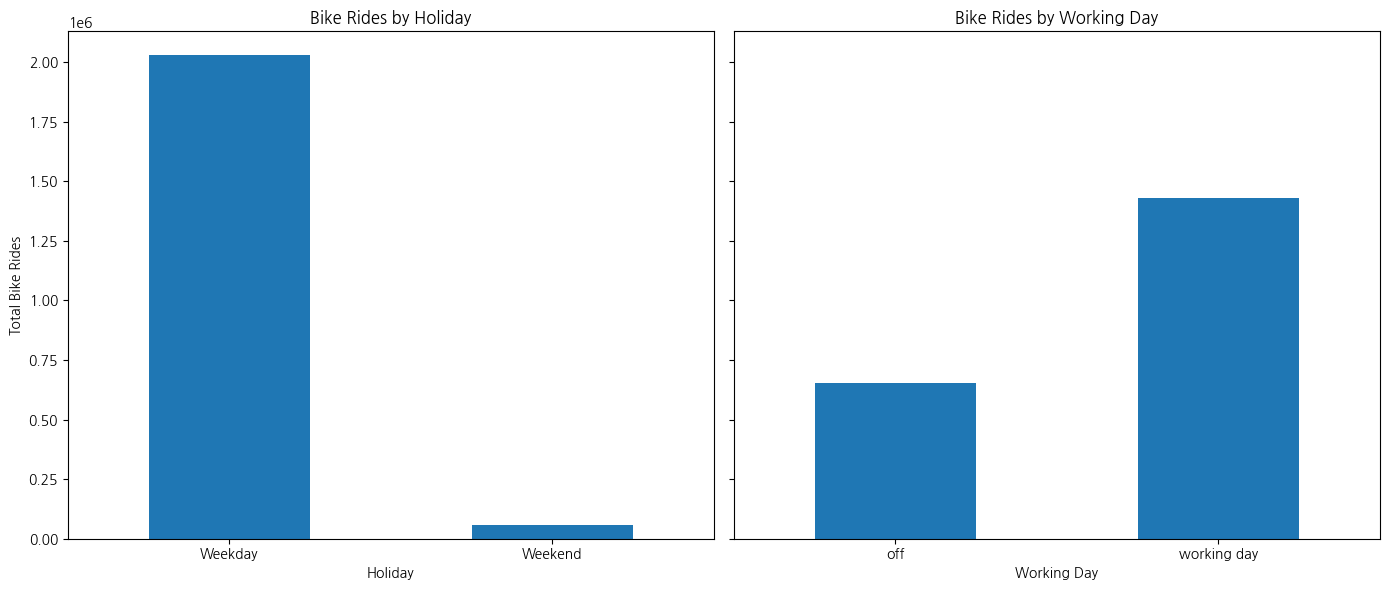

In [42]:
import matplotlib.pyplot as plt

# Group data for holiday and workingday separately
holiday_summary = df_train.groupby('holiday')['count'].sum()
workingday_summary = df_train.groupby('workingday')['count'].sum()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for 'holiday'
holiday_summary.plot(kind='bar', ax=axes[0])
axes[0].set_title('Bike Rides by Holiday')
axes[0].set_xlabel('Holiday')
axes[0].set_ylabel('Total Bike Rides')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Weekday', 'Weekend'], rotation=0)

# Plot for 'workingday'
workingday_summary.plot(kind='bar', ax=axes[1])
axes[1].set_title('Bike Rides by Working Day')
axes[1].set_xlabel('Working Day')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['off', 'working day'], rotation=0)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()



평일에 훨씬 많이탐. 일 안하는 날보단 일하는 날에 더 많이 타고.. 통근용으로 주로 사용되는 것으로 보임

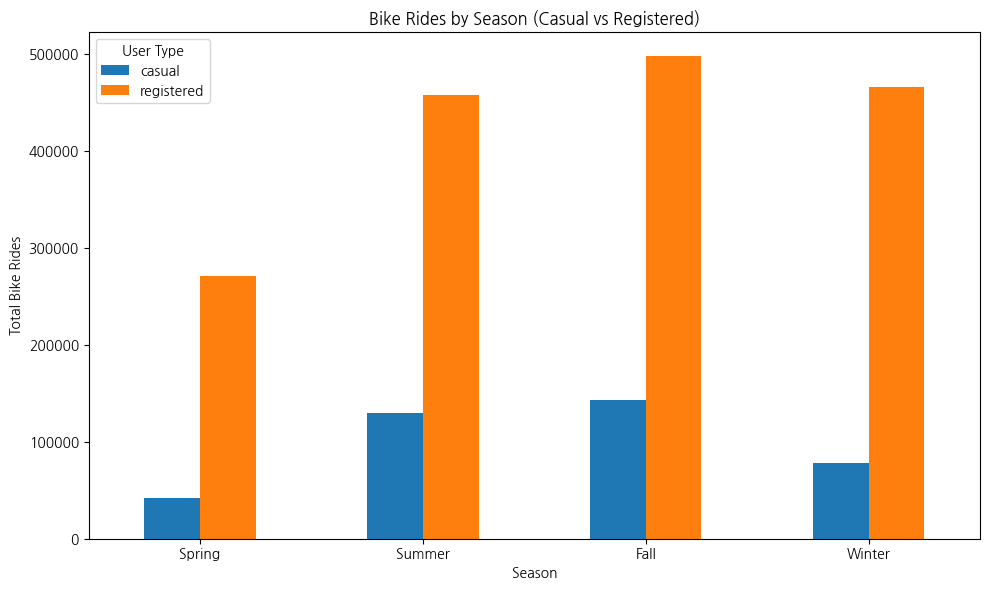

In [43]:
import matplotlib.pyplot as plt

# Group data by 'season' and calculate the sum for 'casual' and 'registered'
season_summary = df_train.groupby('season')[['casual', 'registered']].sum()

# Plot the data
season_summary.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Total Bike Rides')
plt.title('Bike Rides by Season (Casual vs Registered)')
plt.xticks(ticks=range(len(season_summary.index)), labels=['Spring', 'Summer', 'Fall', 'Winter'], rotation=0)

# Add legend
plt.legend(title='User Type')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


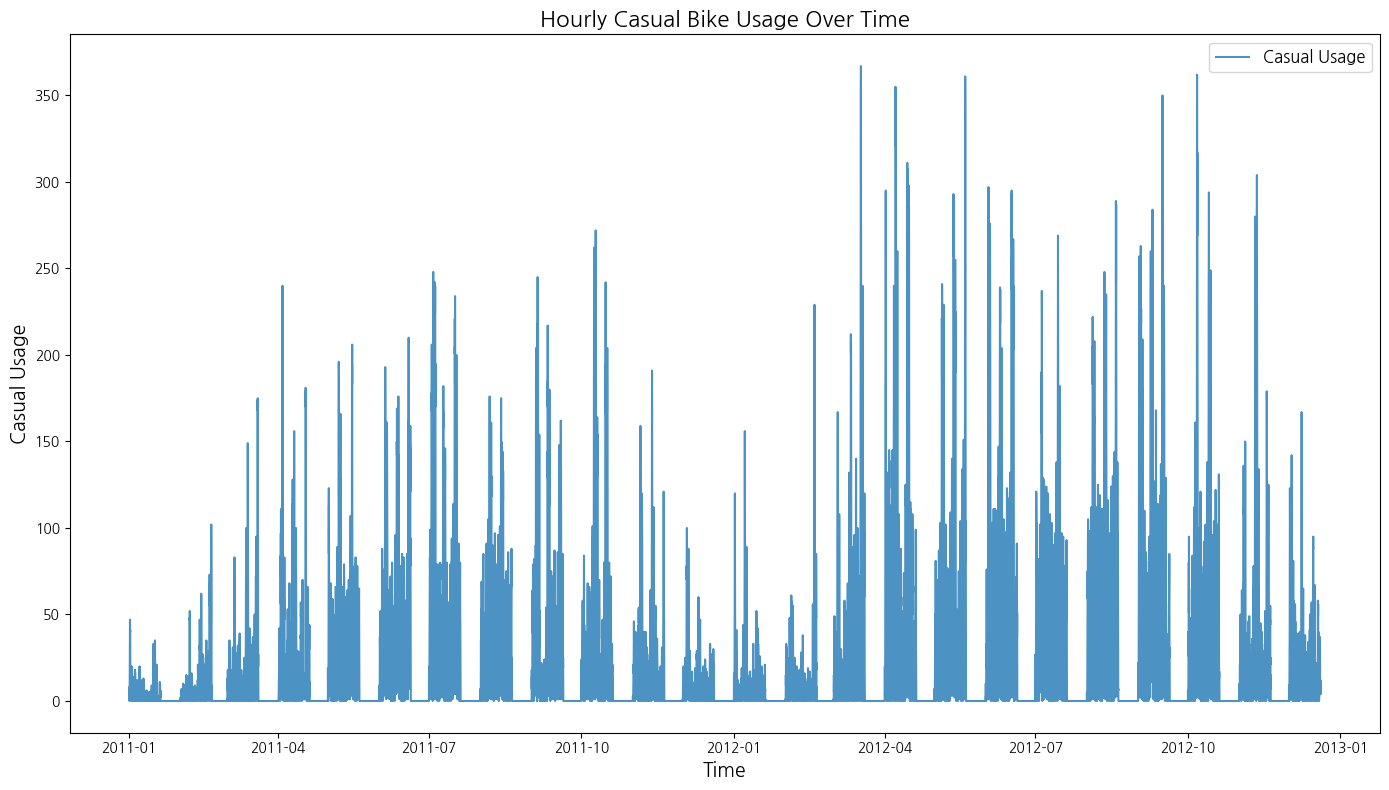

In [44]:
import matplotlib.dates as mdates

# Convert 'datetime' to datetime format if it's not already
df_train['datetime'] = pd.to_datetime(df_train['datetime'])

# Resample data by hour and sum 'casual'
hourly_casual = df_train.resample('h', on='datetime')['casual'].sum()

# Plot the resampled data
plt.figure(figsize=(14, 8))
plt.plot(hourly_casual, label='Casual Usage', alpha=0.8)

# Add labels and title
plt.xlabel('Time', fontsize=14)
plt.ylabel('Casual Usage', fontsize=14)
plt.title('Hourly Casual Bike Usage Over Time', fontsize=16)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



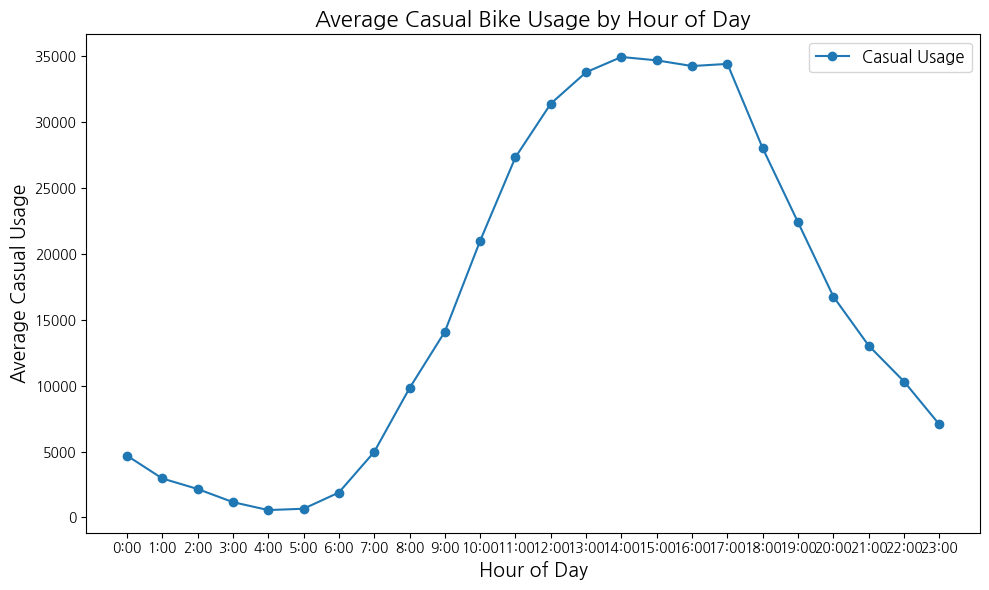

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract hour from 'datetime' and group by hour
df_train['hour'] = df_train['datetime'].dt.hour
hourly_casual = df_train.groupby('hour')['casual'].sum() 

# Plot the grouped data
plt.figure(figsize=(10, 6))
plt.plot(hourly_casual.index, hourly_casual, marker='o', label='Casual Usage')

# Set x-axis labels to hours
plt.xticks(ticks=range(0, 24), labels=[f'{h}:00' for h in range(0, 24)], rotation=0)

# Add labels and title
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average Casual Usage', fontsize=14)
plt.title('Average Casual Bike Usage by Hour of Day', fontsize=16)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()



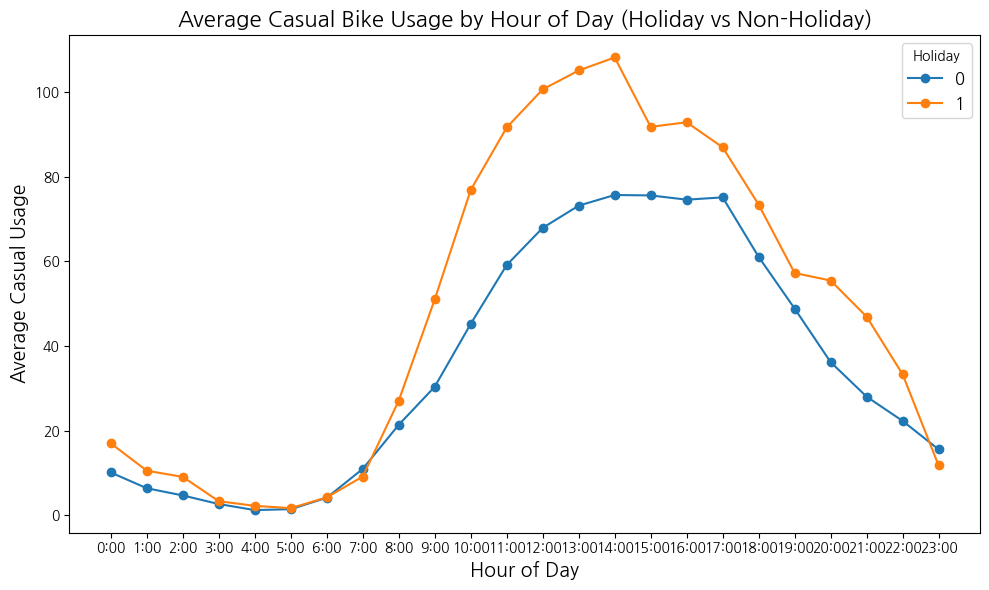

In [46]:
# Group by 'hour' and 'holiday', and calculate the mean 'casual' usage
hourly_casual_by_holiday = df_train.groupby(['hour', 'holiday'])['casual'].mean().unstack()

# Plot the data
hourly_casual_by_holiday.plot(figsize=(10, 6), marker='o')

# Add labels, legend, and title
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average Casual Usage', fontsize=14)
plt.title('Average Casual Bike Usage by Hour of Day (Holiday vs Non-Holiday)', fontsize=16)
plt.xticks(ticks=range(0, 24), labels=[f'{h}:00' for h in range(0, 24)], rotation=0)
plt.legend(title='Holiday', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


미등록 유저는 평일/주말 이용패턴 차이가 존재함.<br>
- 평일: 오전~오후 5시까지 이용하고 이후부터 급격히 사용량이 줄어듬. 아마 아침~오후까지 여행이나 단거리로 이용하는 사람들이 주류일 것임.<br>
- 주말: 오전8시부터 사용량이 급증하고 오후1시 이후부터 급격히 줄어들고 저녁 7시부터 다시 급감함. 

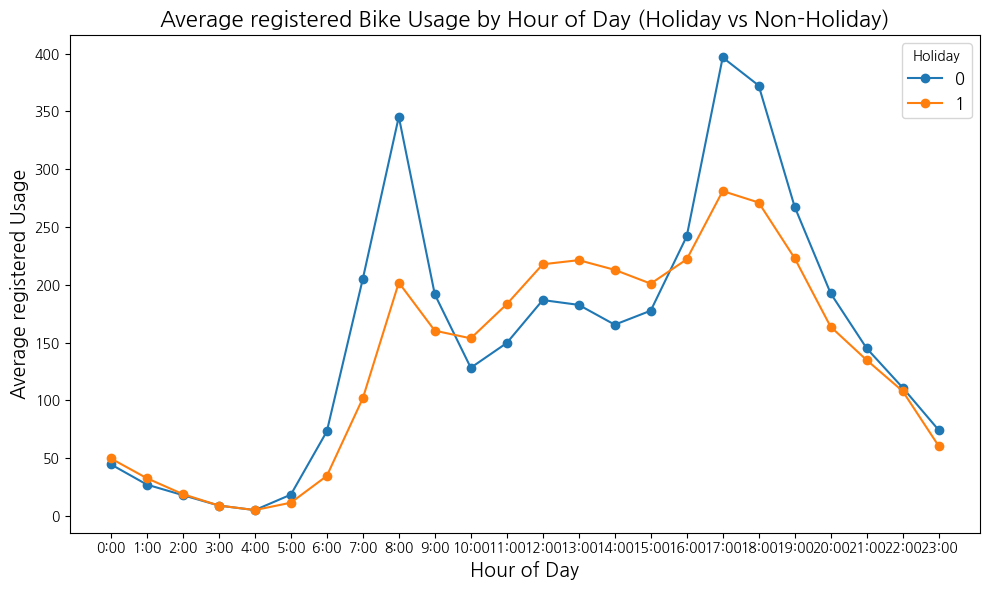

In [47]:
# Group by 'hour' and 'holiday', and calculate the mean 'casual' usage
hourly_casual_by_holiday = df_train.groupby(['hour', 'holiday'])['registered'].mean().unstack()

# Plot the data
hourly_casual_by_holiday.plot(figsize=(10, 6), marker='o')

# Add labels, legend, and title
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average registered Usage', fontsize=14)
plt.title('Average registered Bike Usage by Hour of Day (Holiday vs Non-Holiday)', fontsize=16)
plt.xticks(ticks=range(0, 24), labels=[f'{h}:00' for h in range(0, 24)], rotation=0)
plt.legend(title='Holiday', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

등록된 유저는 러시아워때 급격한 사용량을 띄고 있으며 평일보다 주말에 이러한 사용량이 더 두드러짐. 

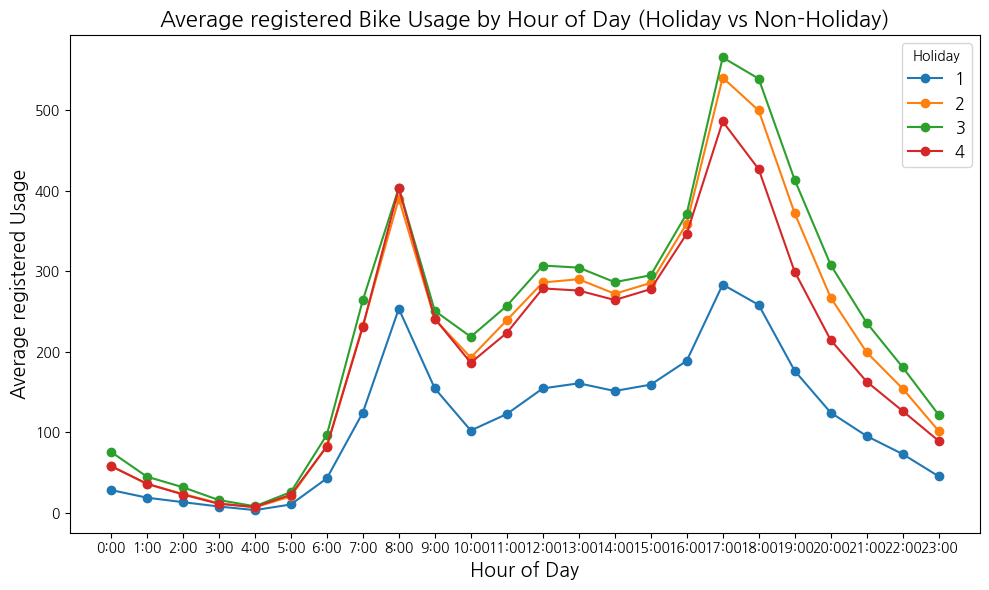

In [48]:
#그럼 계절별 시간대 이용율을 확인해보자
# Group by 'hour' and 'holiday', and calculate the mean 'casual' usage
hourly_casual_by_holiday = df_train.groupby(['hour', 'season'])['count'].mean().unstack()

# Plot the data
hourly_casual_by_holiday.plot(figsize=(10, 6), marker='o')

# Add labels, legend, and title
plt.xlabel('Hour of Day', fontsize=14)
plt.ylabel('Average registered Usage', fontsize=14)
plt.title('Average registered Bike Usage by Hour of Day (Holiday vs Non-Holiday)', fontsize=16)
plt.xticks(ticks=range(0, 24), labels=[f'{h}:00' for h in range(0, 24)], rotation=0)
plt.legend(title='Holiday', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


계절과 상관없이 많이 이용하는 시간대는 일정함. 가을-여름-겨울-봄 순으로 이용함. 피크 시간대의 평균 기온과 습도를 확인하겠음.
- 05:00 ~ 09:00
- 15:00 ~ 19:00

In [49]:
# Group data by 'holiday' and calculate averages for each holiday group during peak times

# Ensure 'holiday' is included in the peak dataframes
morning_avg_by_season = df_train[
    (df_train['hour'] >= 5) & (df_train['hour'] <= 9)
].groupby('season')[['weather', 'temp', 'atemp', 'humidity', 'windspeed']].mean()

evening_avg_by_season = df_train[
    (df_train['hour'] >= 15) & (df_train['hour'] <= 19)
].groupby('season')[['weather', 'temp', 'atemp', 'humidity', 'windspeed']].mean()

# Combine results into a single DataFrame for easy comparison
peak_avg_by_season = pd.concat({
    'Morning Peak (05:00-09:00)': morning_avg_by_season,
    'Evening Peak (15:00-19:00)': evening_avg_by_season
}, axis=1)

# Display the results
peak_avg_by_season

Morning Peak (05:00-09:00)                                              \
                          weather       temp      atemp   humidity  windspeed   
season                                                                          
1                        1.460854  10.210605  12.811343  65.790036  12.203204   
2                        1.489474  20.399298  24.049605  71.271930  11.731841   
3                        1.361404  27.018281  30.767596  72.582456  10.333645   
4                        1.522807  14.823298  18.008789  73.989474  10.625001   

       Evening Peak (15:00-19:00)                                              
                          weather       temp      atemp   humidity  windspeed  
season                                                                         
1                        1.408772  14.880842  17.680491  45.996491  17.486201  
2                        1.380702  25.691895  29.544228  48.568421  16.756195  
3                        1.368421  30.919754  34.586956  53.533333  14.359710  
4                        1.442105  18.529123  22.144772  56.771930  13.307411

온도랑 습도가 차이가 심해서 별 의미가 없는듯.
등록 유저/비등록 유저의 이용패턴이 두드러지게 나타나는 것 같음. 

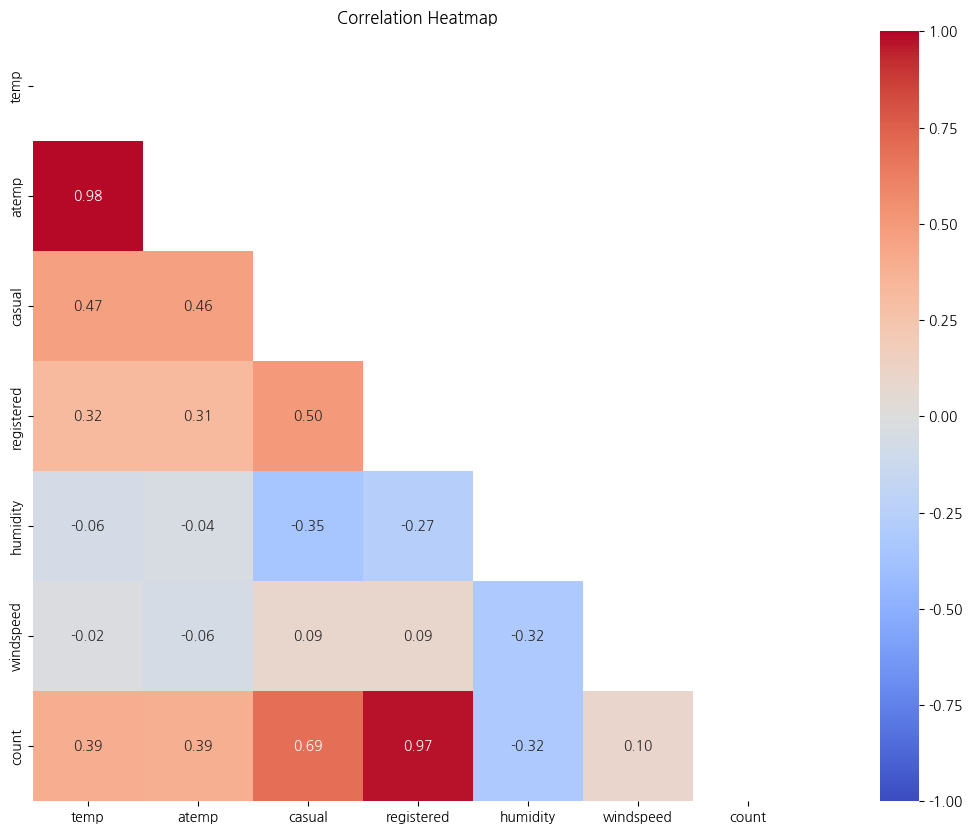

In [50]:
# 상관계수 행렬 계산
corrMatt = df_train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]].corr()

# 하단 삼각형 마스크 생성
mask = np.triu(np.ones_like(corrMatt, dtype=bool))

# 히트맵 시각화
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corrMatt, mask=mask, cmap="coolwarm", vmax=1, vmin=-1, annot=True, fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

# 모델링
- 훈련, 테스트 데이터 전처리 진행

In [51]:
data = pd.read_csv(r'raw\train.csv')

In [52]:
data['datetime'] = pd.to_datetime(data['datetime'])

import calendar

#월별, 요일별, 일별, 시간대별 칼럼 생성

data["date"] = data["datetime"].dt.date
data["hour"] = data["datetime"].dt.hour
data["weekday"] = data["datetime"].dt.weekday.apply(lambda x: calendar.day_name[x])
data["month"] = data["datetime"].dt.month.apply(lambda x: calendar.month_name[x])
data = data.drop(["datetime"], axis=1)

In [53]:
# 1. 요일 원핫 인코딩
data = pd.get_dummies(data, columns=['weekday'])

In [54]:
# 2. 월 싸인/코사인 변환
# 12개월 기준으로 변환 (1월=1, 12월=12)
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
data['month'] = data['month'].map(month_mapping)  # 문자열 월을 숫자로 변환
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)  # sin 변환
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)  # cos 변환

# 결과 출력
data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,month,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_sin,month_cos
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,...,1,False,False,True,False,False,False,False,5.000000e-01,0.866025
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,...,1,False,False,True,False,False,False,False,5.000000e-01,0.866025
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,...,1,False,False,True,False,False,False,False,5.000000e-01,0.866025
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,...,1,False,False,True,False,False,False,False,5.000000e-01,0.866025
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,...,1,False,False,True,False,False,False,False,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,...,12,False,False,False,False,False,False,True,-2.449294e-16,1.000000
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,...,12,False,False,False,False,False,False,True,-2.449294e-16,1.000000
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,...,12,False,False,False,False,False,False,True,-2.449294e-16,1.000000
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,...,12,False,False,False,False,False,False,True,-2.449294e-16,1.000000


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             10886 non-null  int64  
 1   holiday            10886 non-null  int64  
 2   workingday         10886 non-null  int64  
 3   weather            10886 non-null  int64  
 4   temp               10886 non-null  float64
 5   atemp              10886 non-null  float64
 6   humidity           10886 non-null  int64  
 7   windspeed          10886 non-null  float64
 8   casual             10886 non-null  int64  
 9   registered         10886 non-null  int64  
 10  count              10886 non-null  int64  
 11  date               10886 non-null  object 
 12  hour               10886 non-null  int32  
 13  month              10886 non-null  int64  
 14  weekday_Friday     10886 non-null  bool   
 15  weekday_Monday     10886 non-null  bool   
 16  weekday_Saturday   108

In [56]:
bool_columns = ['weekday_Monday', 'weekday_Tuesday', 'weekday_Wednesday', 'weekday_Thursday', 'weekday_Friday', 'weekday_Saturday', 'weekday_Sunday']
data[bool_columns] = data[bool_columns].astype(int)
data.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,month,weekday_Friday,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,month_sin,month_cos
0,1,0,0,1,9.84,14.395,81,0.0,3,13,...,1,0,0,1,0,0,0,0,0.5,0.866025
1,1,0,0,1,9.02,13.635,80,0.0,8,32,...,1,0,0,1,0,0,0,0,0.5,0.866025


<Axes: xlabel='workingday', ylabel='count'>

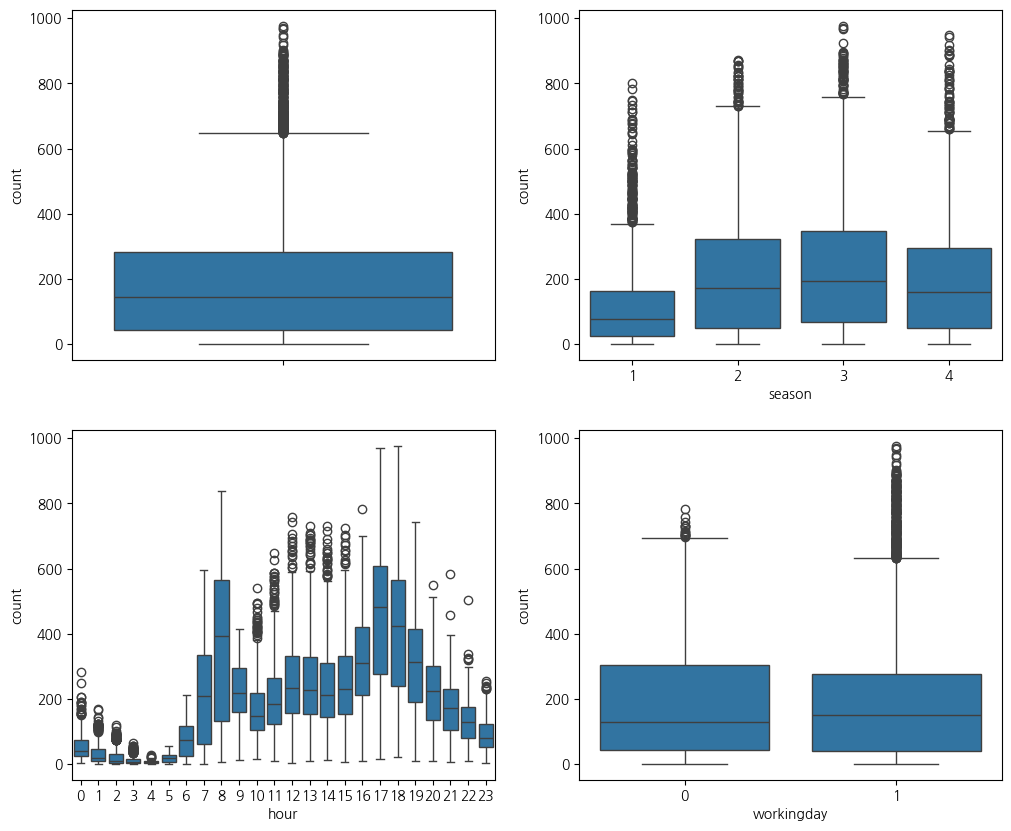

In [57]:
# 이상치 확인
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)

sns.boxplot(data=data, y="count", orient="v", ax=axes[0][0])
sns.boxplot(data=data, y="count", x="season", orient="v", ax=axes[0][1])
sns.boxplot(data=data, y="count", x="hour", orient="v", ax=axes[1][0])
sns.boxplot(data=data, y="count", x="workingday", orient="v", ax=axes[1][1])

In [58]:
column_names = data.columns.tolist()
print(column_names)

['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count', 'date', 'hour', 'month', 'weekday_Friday', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday', 'month_sin', 'month_cos']


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             10886 non-null  int64  
 1   holiday            10886 non-null  int64  
 2   workingday         10886 non-null  int64  
 3   weather            10886 non-null  int64  
 4   temp               10886 non-null  float64
 5   atemp              10886 non-null  float64
 6   humidity           10886 non-null  int64  
 7   windspeed          10886 non-null  float64
 8   casual             10886 non-null  int64  
 9   registered         10886 non-null  int64  
 10  count              10886 non-null  int64  
 11  date               10886 non-null  object 
 12  hour               10886 non-null  int32  
 13  month              10886 non-null  int64  
 14  weekday_Friday     10886 non-null  int64  
 15  weekday_Monday     10886 non-null  int64  
 16  weekday_Saturday   108

In [60]:
# 여러개의 변수등 중 RMSLE가 제일 낮은 조합으로 선정
X = data[['hour', 'month_sin', 'month_cos', 'holiday', 'workingday']]
y = data['count']

In [61]:
# RMSLE 계산 함수
def calculate_rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# 최적의 RMSLE를 찾는 함수
def optimize_rmsle(data, target, model=RandomForestRegressor(), test_size=0.2, random_state=42):
    best_rmsle, best_features = float('inf'), None
    features = data.columns
    results = []

    for i in range(1, len(features) + 1):
        for combo in combinations(features, i):
            X_train, X_test, y_train, y_test = train_test_split(
                data[list(combo)], target, test_size=test_size, random_state=random_state
            )
            model.fit(X_train, y_train)
            rmsle = calculate_rmsle(y_test, model.predict(X_test))
            results.append((combo, rmsle))
            if rmsle < best_rmsle:
                best_rmsle, best_features = rmsle, combo

    print(f"최적의 RMSLE: {best_rmsle}\n최적의 변수 조합: {best_features}")
    return best_rmsle, best_features, results


In [62]:
# 독립 변수 (data)와 종속 변수 (target) 분리
data = X
target = y  # 예측할 값 (생존 여부)

# 최적의 RMSLE 찾기
best_rmsle, best_features, results = optimize_rmsle(data, target)

최적의 RMSLE: 0.48748522263292304
최적의 변수 조합: ('hour', 'month_sin', 'month_cos', 'holiday', 'workingday')


In [63]:
#다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
vif_X = pd.DataFrame()
vif_X['feature'] = X.columns
vif_X['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_X)

      feature       VIF
0        hour  2.097065
1   month_sin  1.002200
2   month_cos  1.002581
3     holiday  1.048327
4  workingday  2.053550


In [64]:
# 독립변수 상관계수 확인
correlation_matrix = X.corr()
print(correlation_matrix)

                hour  month_sin  month_cos   holiday  workingday
hour        1.000000   0.004731   0.004151 -0.000354    0.002780
month_sin   0.004731   1.000000  -0.002721 -0.046465    0.013617
month_cos   0.004151  -0.002721   1.000000  0.048594   -0.025174
holiday    -0.000354  -0.046465   0.048594  1.000000   -0.250491
workingday  0.002780   0.013617  -0.025174 -0.250491    1.000000


In [65]:
# 2. 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

----------

## LGBMClassifier

In [66]:
# 3. 모델 생성 및 학습
clf = lgb.LGBMRegressor(random_state=42, bagging_seed=42, feature_fraction_seed=42)
clf.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 49
[LightGBM] [Info] Number of data points in the train set: 8708, number of used features: 5
[LightGBM] [Info] Start training from score 191.584750


LGBMRegressor(bagging_seed=42, feature_fraction_seed=42, random_state=42)

In [67]:
# 4. 모델 예측
y_pred = clf.predict(X_test)
lgbm_features = clf.feature_importances_

In [68]:
# 5. 결과 평가
from sklearn.metrics import root_mean_squared_log_error
rmsle = root_mean_squared_log_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # R² 스코어
print(f"RMSLE: {rmsle}")
print(f"R-squared: {r2}")

RMSLE: 0.4925267370062458
R-squared: 0.7605821437199815


## 다중회귀

In [69]:
# 3. 다중 선형 회귀 모델
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [70]:
# 4. 릿지 회귀 모델
ridge_model = Ridge(random_state=42)  # alpha: 정규화 강도
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

In [71]:
# 5. 라쏘 회귀 모델
lasso_model = Lasso(random_state=42)  # alpha: 정규화 강도
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

In [72]:
# 6. 성능 평가 함수
def evaluate_model(name, y_test, y_pred):
    print(f"{name} - RMSLE: {rmsle:}, R²: {r2:}")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)

Linear Regression - RMSLE: 0.4925267370062458, R²: 0.7605821437199815
Ridge Regression - RMSLE: 0.4925267370062458, R²: 0.7605821437199815
Lasso Regression - RMSLE: 0.4925267370062458, R²: 0.7605821437199815


## 랜덤포레스트

In [73]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rfr_features = model.feature_importances_

In [74]:
print("RMSLE:", rmsle)
print("R²:", r2)

RMSLE: 0.4925267370062458
R²: 0.7605821437199815


## 모델 고르기

In [75]:
cols = X_train.columns.values

feature_dataframe = pd.DataFrame(
    {
        'features': cols,
        'Random Forest Regressor feature importances': rfr_features,
        'LightGBM Regressor feature importances': lgbm_features
    }
)

# Scatter plot for feature importance
def plot_feature_importance(model_name):
    # Extract data
    y_values = feature_dataframe[model_name].values
    x_values = np.arange(len(y_values))  # Numerical index for the features
    feature_labels = feature_dataframe['features'].values

    # Create the scatter plot
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        x=x_values,
        y=y_values,
        c=y_values,  # Color the points by their importance values
        cmap='viridis',
        s=100,  # Size of points
        edgecolor='k',
        alpha=0.7
    )
    plt.colorbar(scatter, label="Feature Importance")  # Add color bar

    # Add text labels to the x-axis
    plt.xticks(x_values, feature_labels, rotation=45, ha='right')
    
    # Add labels and title
    plt.xlabel("Features")
    plt.ylabel("Feature Importance")
    plt.title(f"{model_name} Feature Importances", fontsize=14)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

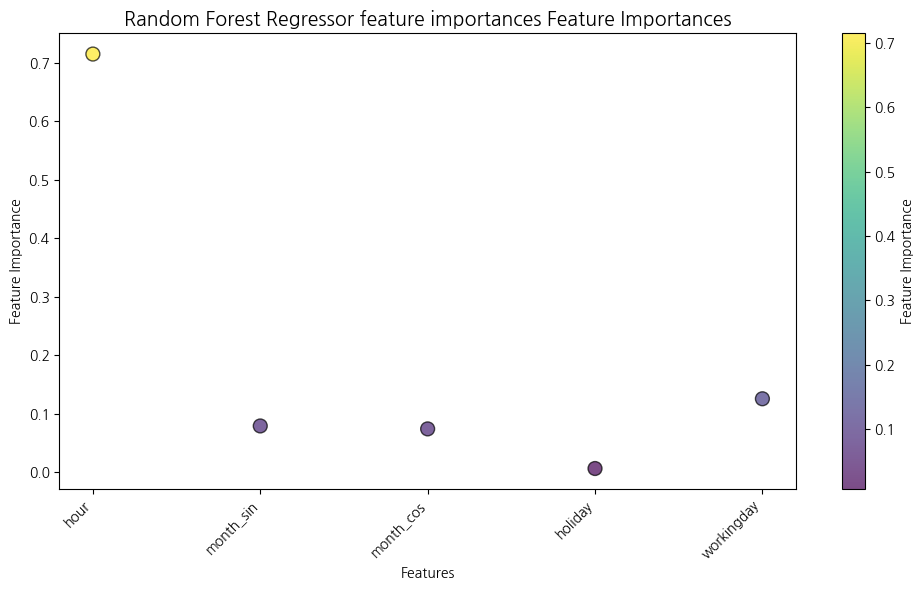

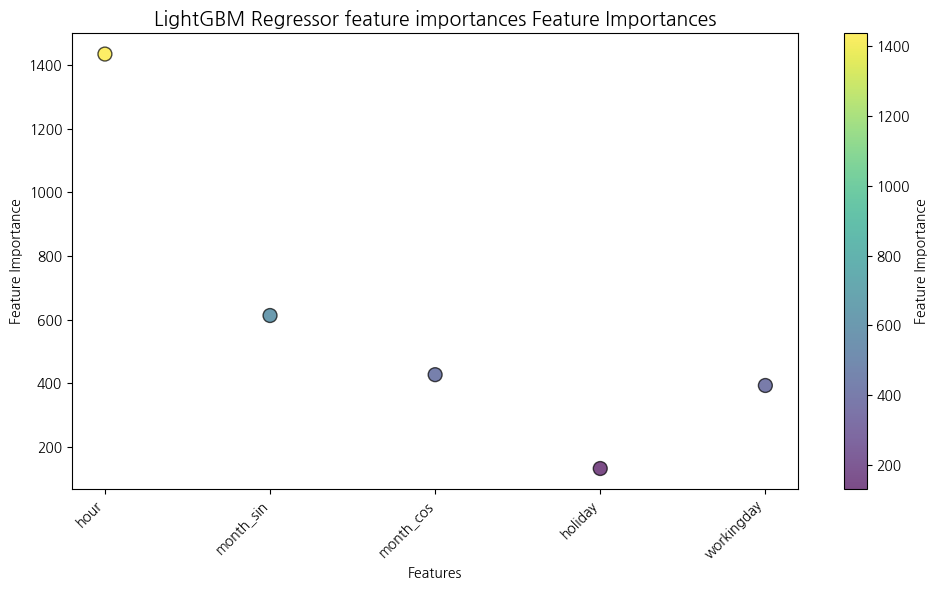

In [76]:
# Plot each feature importance with titles
plot_feature_importance('Random Forest Regressor feature importances')
plot_feature_importance('LightGBM Regressor feature importances')

LightGBM이 랜덤 포레스트보다 month_sin과 month_cos의 중요도를 좀 더 반영하는 것을 알 수 있음.

In [77]:
# 훈련 데이터와 테스트 데이터의 성능 비교
from sklearn.metrics import r2_score

# 랜덤포레스트
rf_train_preds = model.predict(X_train)
rf_test_preds = model.predict(X_test)
print("랜덤포레스트 R² (Train):", r2_score(y_train, rf_train_preds))
print("랜덤포레스트 R² (Test):", r2_score(y_test, rf_test_preds))

# LightGBM
lgb_train_preds = clf.predict(X_train)
lgb_test_preds = clf.predict(X_test)
print("LightGBM R² (Train):", r2_score(y_train, lgb_train_preds))
print("LightGBM R² (Test):", r2_score(y_test, lgb_test_preds))


랜덤포레스트 R² (Train): 0.7894099202935361
랜덤포레스트 R² (Test): 0.7485806170381408
LightGBM R² (Train): 0.7862666078406289
LightGBM R² (Test): 0.7605821437199815


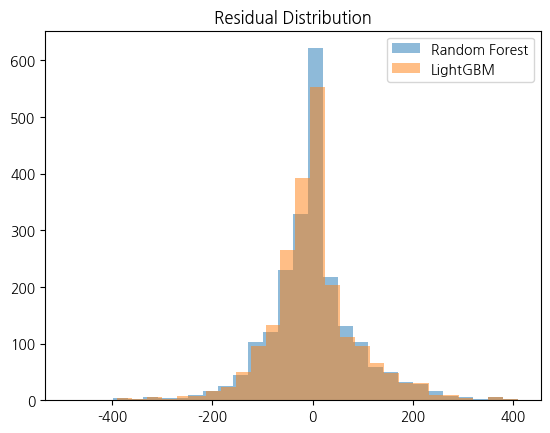

In [78]:
# 잔차 계산
rf_residuals = y_test - rf_test_preds
lgb_residuals = y_test - lgb_test_preds

# 잔차 시각화
plt.hist(rf_residuals, bins=30, alpha=0.5, label="Random Forest")
plt.hist(lgb_residuals, bins=30, alpha=0.5, label="LightGBM")
plt.legend()
plt.title("Residual Distribution")
plt.show()

In [79]:
print("Random Forest Residual Mean:", rf_residuals.mean())
print("LightGBM Residual Mean:", lgb_residuals.mean())
print("Random Forest Residual Variance:", rf_residuals.var())
print("LightGBM Residual Variance:", lgb_residuals.var())

Random Forest Residual Mean: 0.29607927108180904
LightGBM Residual Mean: 0.5398869669586953
Random Forest Residual Variance: 8302.307680884673
LightGBM Residual Variance: 7905.788187712041


- 결정 계수<br>
LightGBM은 테스트 데이터에서 약간 더 높은 R²(0.761)을 기록해서 일반화 성능이 조금 더 나음. <br>
➡ LightGBM이 R² 기준으로 약간 더 우수.
<br>
- 잔차 평균<br>
Random Forest가 더 0에 가까운 값을 보여서, 전체적으로 예측의 균형이 더 잘 맞음. <br>
➡ Random Forest가 잔차 평균에서 더 나음.
<br>
- 잔차 분산<br>
LightGBM의 분산이 더 작아, 예측이 조금 더 안정적이라는 것을 의미해.<br>
➡ LightGBM이 잔차 분산에서 더 나음.


### 결론
LightGBM이 테스트 데이터에서의 결정 계수값이 더 높고 잔차 분산도 더 작아 안정적이고 일반적인 성능을 보여줌. Random Forest는 잔차 평균이 0에 더 가까워 train 데이터셋에 대해 예측 정확도가 조금 더 나음. 그러나 우리는 값이 정해지지 않은 미지의 테스트 데이터에서의 정확도를 중시해야 함.
<br>
➡ LightGBM 선택.

# 테스트
- 훈련 데이터와 동일하게 전처리한 뒤 투입

In [80]:
df_test = pd.read_csv(r"raw\test.csv")

In [81]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [82]:
df_test['datetime'] = pd.to_datetime(df_test['datetime'])

import calendar

#월별, 요일별, 일별, 시간대별 칼럼 생성

df_test["date"] = df_test["datetime"].dt.date
df_test["hour"] = df_test["datetime"].dt.hour
df_test["weekday"] = df_test["datetime"].dt.weekday.apply(lambda x: calendar.day_name[x])
df_test["month"] = df_test["datetime"].dt.month.apply(lambda x: calendar.month_name[x])

In [83]:
# 2. 월 싸인/코사인 변환
# 12개월 기준으로 변환 (1월=1, 12월=12)
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df_test['month'] = df_test['month'].map(month_mapping)  # 문자열 월을 숫자로 변환
df_test['month_sin'] = np.sin(2 * np.pi * df_test['month'] / 12)  # sin 변환
df_test['month_cos'] = np.cos(2 * np.pi * df_test['month'] / 12)  # cos 변환

In [84]:
X_test_features =df_test[['hour', 'month_sin', 'month_cos', 'holiday', 'workingday']]

In [ ]:
# LGB 모델로 테스트 데이터 예측
predicted_counts = clf.predict(X_test_features)

In [90]:
# 예측 값을 테스트 데이터에 추가
df_test['predicted_count'] = predicted_counts

# 다시 형변환
# datetime 열을 object 타입으로 변환
df_test['datetime'] = df_test['datetime'].astype('object')

# 예측 결과를 CSV로 저장
df_test.to_csv('test_predictions.csv', index=False)
print("예측 결과가 test_predictions.csv에 저장되었습니다!")

예측 결과가 test_predictions.csv에 저장되었습니다!
